# Document Level Sentiment Analysis
This notebook shows the of sentiment analysis at the document level using VADER and TEXTBLOB

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
pd.set_option('display.width',-1)
import re
import pickle

In [2]:
# run some files containing custom functions
%run -i '../scripts/helper_functions.py'

## Load Data

In [3]:
df = pd.read_csv('../data/all_data.csv')
df.head()

,reviews,rating,company
0,great card! we get cash back for our grocery a...,4.0,American Express Blue Cash Preferred
1,while traveling we had to keep calling the cre...,1.0,Credit One Bank
2,great card to have! love all the additional cr...,5.0,Capital One Quicksilver Rewards
3,no tengo tanta experiencia asi que no puedo da...,2.0,Citi Double Cash Card
4,this is a basic credit card the cash back dea...,4.0,Bank of America Cash Rewards Credit Card


In [3]:
# Shape of data
df.shape

(25708, 3)

In [5]:
# Missing values
df.isnull().sum()

reviews    0
rating     0
company    0
dtype: int64

In [18]:
# Count of total reviews to each credit card
review_count = df.groupby('company')['reviews'].count().sort_values(ascending = False)
review_count.head()

company
Bank of America Cash Rewards Credit Card    2476
Capital One Quicksilver Rewards             2292
Capital One Venture Rewards                 2204
Capital One Platinum                        2103
Credit One Bank                             2016
Name: reviews, dtype: int64

In [20]:
len(review_count)

40

In [4]:
# Data Pre-processing
df = pre_process_text(df, 'reviews')

## Sentiment Analysis with VADER and TextBlob

In [7]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
from textblob import TextBlob

In [8]:
vader_analyser = SentimentIntensityAnalyzer()

In [9]:
def vader_sentiment_scores(sentence):
    score = vader_analyser.polarity_scores(sentence)
    return score['compound']

def blob_sentiment_polarity(sentence):
    score = TextBlob(sentence).sentiment.polarity
    return score

In [10]:
df['vader_sentiment'] = df.reviews.apply(vader_sentiment_scores)
df['blob_sentiment'] = df.reviews.apply(blob_sentiment_polarity)

In [11]:
df.head()

,reviews,rating,company,vader_sentiment,blob_sentiment
0,great card! we get cash back for our grocery a...,4.0,American Express Blue Cash Preferred,0.7455,0.2645
1,while traveling we had to keep calling the cre...,1.0,Credit One Bank,0.2335,-0.0875
2,great card to have! love all the additional cr...,5.0,Capital One Quicksilver Rewards,0.9097,0.8125
3,no tengo tanta experiencia asi que no puedo da...,2.0,Citi Double Cash Card,-0.5267,0.0000
4,this is a basic credit card the cash back dea...,4.0,Bank of America Cash Rewards Credit Card,0.7490,0.2600


## Plots

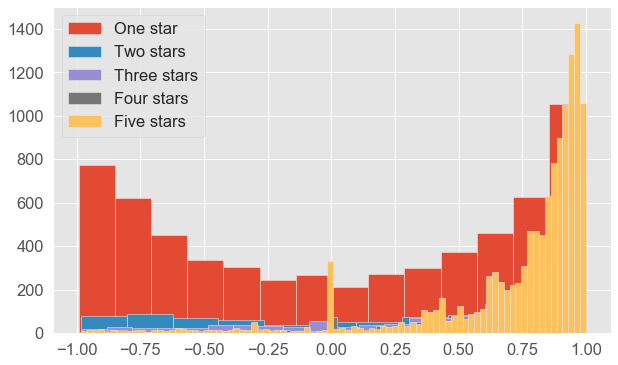

In [12]:
# Plot of vaderSentiment analysis
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

df[df.rating == 1].vader_sentiment.hist(bins = 'auto',figsize=(10,6), label = 'One star')
df[df.rating == 2].vader_sentiment.hist(bins = 'auto',label = 'Two stars')
df[df.rating == 3].vader_sentiment.hist(bins = 'auto',label = 'Three stars')
df[df.rating == 4].vader_sentiment.hist(bins = 'auto',label = 'Four stars')
df[df.rating == 5].vader_sentiment.hist(bins = 'auto',label = 'Five stars')
plt.legend(loc = 'best')

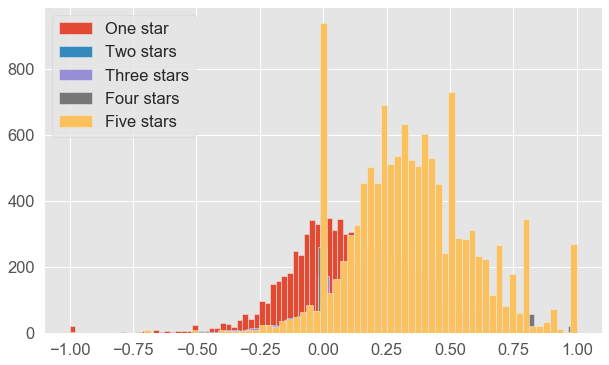

In [13]:
# Plot of TextBlob analysis
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

df[df.rating == 1].blob_sentiment.hist(bins = 'auto',figsize=(10,6), label = 'One star')
df[df.rating == 2].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Two stars')
df[df.rating == 3].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Three stars')
df[df.rating == 4].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Four stars')
df[df.rating == 5].blob_sentiment.hist(bins = 'auto',figsize=(10,6),label = 'Five stars')
plt.legend(loc = 'upper left')

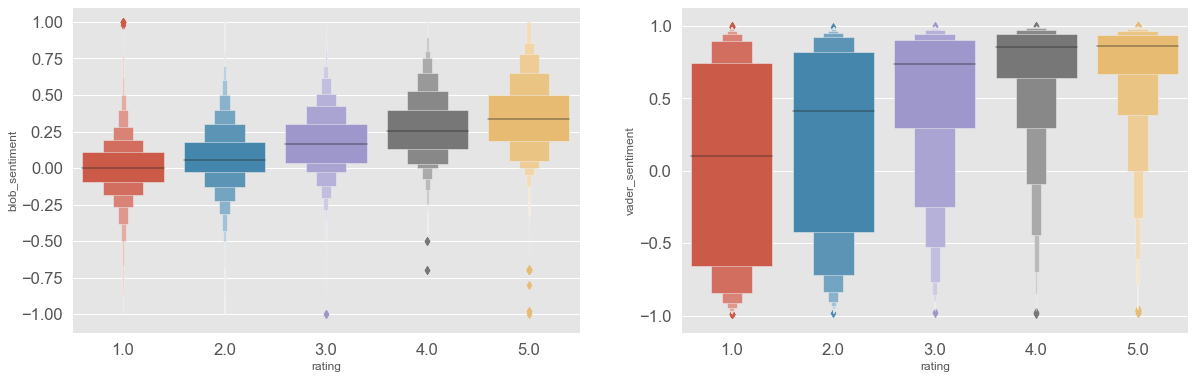

In [14]:
sns.set(font_scale = 1.5)
plt.style.use('ggplot')

gridsize = (1, 2)
fig = plt.figure(figsize=(20, 6))
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax2 = plt.subplot2grid(gridsize, (0, 1))
sns.boxenplot(x = 'rating', y = 'blob_sentiment', data = df, ax = ax1)
sns.boxenplot(x = 'rating', y = 'vader_sentiment', data = df, ax = ax2)

### The most negative polarity with 4 or 5 star rating (VADER)

In [15]:
df[(df.rating >= 4) & (df.vader_sentiment == -1)][['reviews', 'rating', 'vader_sentiment']]

,reviews,rating,vader_sentiment


### The most positive polarity with 1 star rating (VADER)

In [16]:
df[(df.rating == 1) & (df.vader_sentiment == 1)][['reviews', 'rating', 'vader_sentiment']]

,reviews,rating,vader_sentiment


## Mean sentiment for each credit card (VADER)

In [17]:
df.groupby('company')['vader_sentiment'].mean().sort_values(ascending = False).round(2)

company
Chase Freedom Unlimited                               0.91
Chase Sapphire Preffered Card                         0.83
Capital One Secured Credit Card                       0.81
Bank of America Cash Rewards Credit Card              0.75
Citi Double Cash Card                                 0.74
American Express Business Gold Rewards Credit Card    0.72
Discover it Secured                                   0.72
Bank of America Travel Rewards Credit Card            0.71
American Express Blue Cash Preferred                  0.70
TD Cash Visa Credit Card                              0.69
Capital One Venture Rewards                           0.68
Discover it Cash Back                                 0.67
Citi Diamond Preferred Card                           0.67
Discover it Miles                                     0.66
Capital One Quicksilver Rewards                       0.66
Citi Simplicity Card                                  0.65
Capital One Platinum                            